# Hindenburg Omen

https://www.quantifiedstrategies.com/hindenburg-omen/  
https://www.investopedia.com/terms/h/hindenburgomen.asp  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2016-01-01'
end = '2022-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074741,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040895,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157446,283192000


In [3]:
# Calculate the 52-day high and low
df['52 High'] = df['Close'].rolling(window=52).max()
df['52 Low'] = df['Close'].rolling(window=52).min()
    
# Calculate the 10-day moving average of the number of new 52-week highs and lows
df['New Highs'] = (df['High'] >= df['52 High'].shift(1)).rolling(window=10).sum()
df['New Lows'] = (df['Low'] <= df['52 Low'].shift(1)).rolling(window=10).sum()
    
# Calculate the Hindenburg Omen
df['OMEN'] = (df['New Highs'] / (df['New Highs'] + df['New Lows'])) * 100

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,52 High,52 Low,New Highs,New Lows,OMEN
Date,,,,,,,,,,,
2016-03-18,26.584999,26.6250,26.297501,26.480000,24.336338,176820800,26.4925,23.355,1.0,0.0,100.0
2016-03-21,26.482500,26.9125,26.285000,26.477501,24.334042,142010800,26.4925,23.355,2.0,0.0,100.0
2016-03-22,26.312500,26.8225,26.302500,26.680000,24.520147,129777600,26.6800,23.355,3.0,0.0,100.0
2016-03-23,26.620001,26.7675,26.475000,26.532499,24.384586,102814000,26.6800,23.355,4.0,0.0,100.0
2016-03-24,26.367500,26.5625,26.222500,26.417500,24.278900,104532000,26.6800,23.355,4.0,0.0,100.0


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,52 High,52 Low,New Highs,New Lows,OMEN
Date,,,,,,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016129,74919600,180.330002,140.910004,4.0,0.0,100.0
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983688,79144300,180.330002,143.759995,4.0,0.0,100.0
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,180.330002,144.839996,5.0,0.0,100.0
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.901627,59773000,180.330002,146.550003,5.0,0.0,100.0
2021-12-31,178.089996,179.229996,177.259995,177.570007,176.276230,64062300,180.330002,147.869995,4.0,0.0,100.0


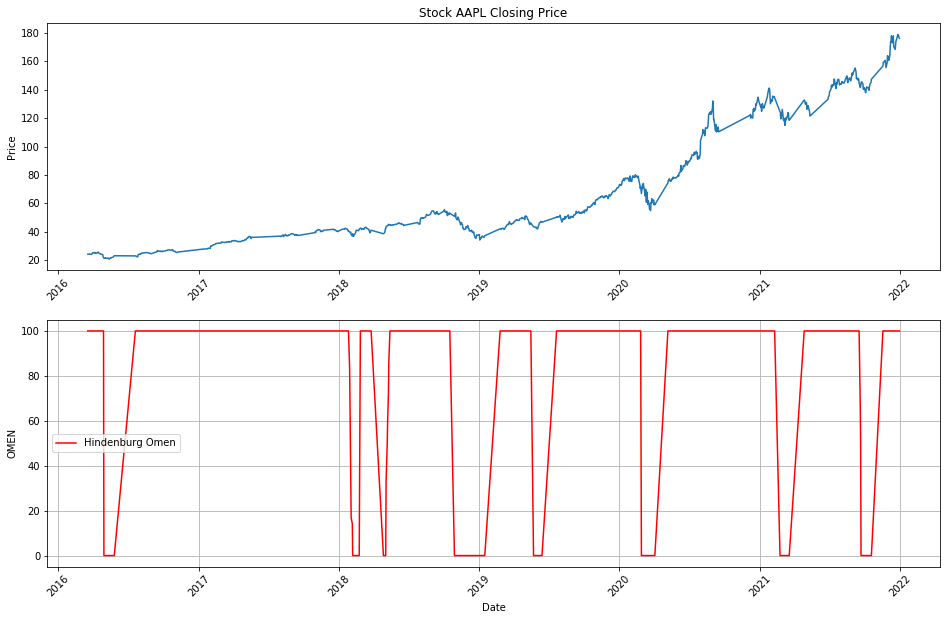

In [9]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['OMEN'] , label='Hindenburg Omen', color='red')
ax2.grid()
ax2.set_ylabel('OMEN')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

## Candlestick with Hindenburg Omen

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,52 High,52 Low,New Highs,New Lows,OMEN,VolumePositive
0,736041.0,26.584999,26.6250,26.297501,26.480000,24.336338,176820800,26.4925,23.355,1.0,0.0,100.0,False
1,736044.0,26.482500,26.9125,26.285000,26.477501,24.334042,142010800,26.4925,23.355,2.0,0.0,100.0,False
2,736045.0,26.312500,26.8225,26.302500,26.680000,24.520147,129777600,26.6800,23.355,3.0,0.0,100.0,False
3,736046.0,26.620001,26.7675,26.475000,26.532499,24.384586,102814000,26.6800,23.355,4.0,0.0,100.0,False
4,736047.0,26.367500,26.5625,26.222500,26.417500,24.278900,104532000,26.6800,23.355,4.0,0.0,100.0,False


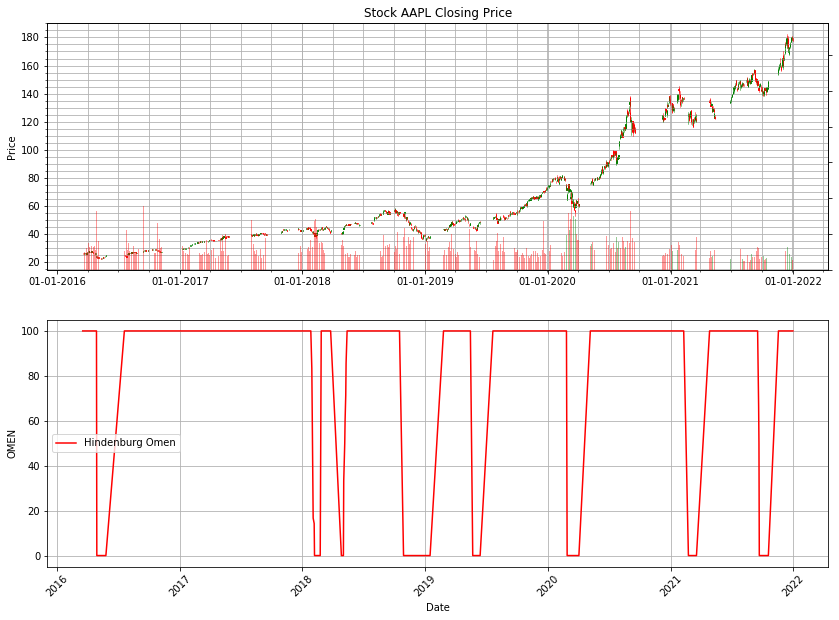

In [11]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['OMEN'] , label='Hindenburg Omen', color='red')
ax2.grid()
ax2.set_ylabel('OMEN')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')